# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

In [1]:
!pip install jupyterthemes

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.7 MB/s eta 0:00:00


In [2]:
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


In [3]:
df= pd.read_csv("UniversalBank.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
# Obtain dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# Obtain the statistical summary of the dataframe
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
# For better visualization
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
# See how many null values exist in the dataframe
df.isnull()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


MINI CHALLENGE #2:
- What is the average age in this dataset?
- What is the % of customers who have credit cards?
- What is the % of customers who accepted the personal loan?


In [8]:
df['Age'].mean()

45.3384

In [9]:
cc=df[df['CreditCard']==1]

In [10]:
cc=len(cc) / len(df)*100
cc


29.4

In [11]:
no_cc=df[df['CreditCard']==0]
no_cc=len(no_cc)/len(df)*100
no_cc


70.6

# TASK #4: PERFORM DATA VISUALIZATION

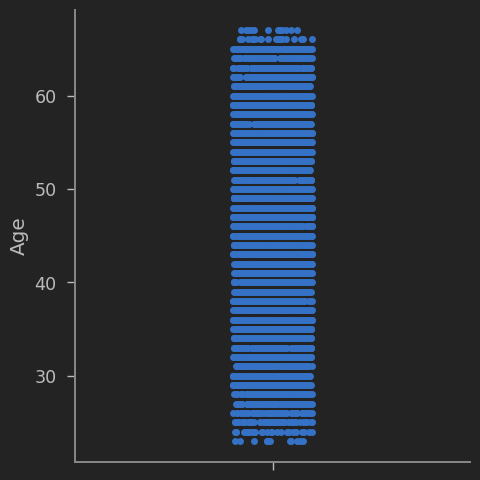

In [12]:
# Visualize Age
# Uniform distribution between 30-60 years
sns.catplot(df['Age'])

<Axes: xlabel='CreditCard', ylabel='Count'>

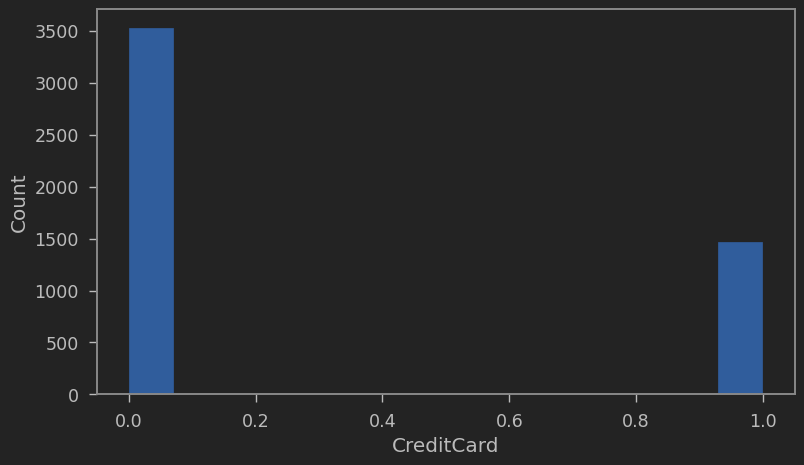

In [13]:
 # Visualize credit card availability feature
# Recall that ~29% of customers have credit cards
plt.figure(figsize = (9,5))
sns.histplot(df["CreditCard"])


In [14]:
# Create two dataframes for the two classes
personalloans = df[df['Personal Loan'] == 1]
no_personalloans = df[df['Personal Loan'] == 0]

In [15]:
personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


<Axes: xlabel='Personal Loan', ylabel='Count'>

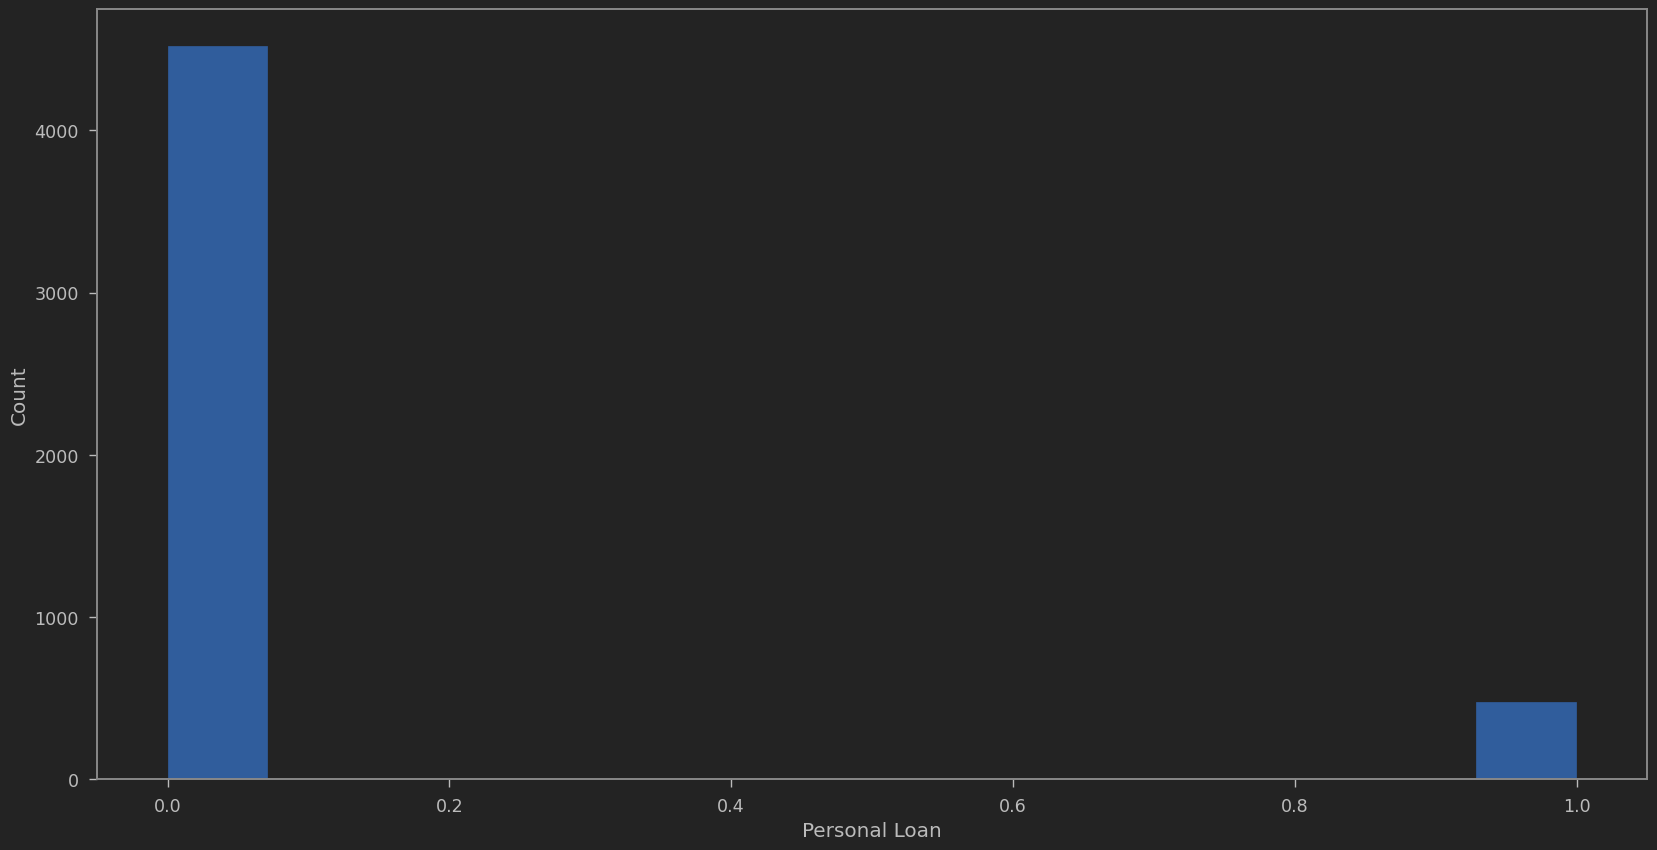

In [16]:
# Plot the distribution plot for both classes separately
# Customers who took personal loans tend to have higher income
plt.figure(figsize = (20, 10))
sns.histplot(df['Personal Loan'])

# TASK #5: PREPARE THE DATA BEFORE TRAINING THE MODEL

In [17]:
# List all column names
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [18]:
# Specify model input features (all data except for the target variable)
X=df.drop(columns=['Personal Loan'])
X

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [19]:
# Model output (target variable)
y=df['Personal Loan']
y

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [20]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [21]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [22]:
# scale the data before training the model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)


In [36]:
# spliting the data into testing and training sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)

In [37]:
# print the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2500, 13), (2500, 13), (2500, 2), (2500, 2))

# TASK #6: UNDERSTAND THE THEORY AND INTUITION BEHIND ARTIFICIAL NEURAL NETWORKS AND GRADIENT DESCENT

# TASK #7: BUILD A SIMPLE MULTI LAYER NEURAL NETWORK MODEL

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Create the model
ANN_model = Sequential()

# Add layers
ANN_model.add(Dense(250, input_dim=13, kernel_initializer='normal', activation='relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation='relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation='relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation='relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(250, activation='relu'))
ANN_model.add(Dropout(0.4))

# Output layer with softmax activation
ANN_model.add(Dense(2, activation='softmax'))

# Compile the model
ANN_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train the model with Early Stopping
# history = ANN_model.fit(X_train, y_train,
#                         validation_data=(X_val, y_val),
#                         epochs=100,
#                         )

# Save the model after training
ANN_model.save('model_best_point_early_stopping.h5')


# TASK #8: COMPILE AND TRAIN DEEP LEARNING MODEL

In [40]:
# Compile the model
ANN_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [41]:
history=ANN_model.fit(X_train,y_train,epochs=30,validation_split=0.2,verbose=1,callbacks=[early_stopping])

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8647 - loss: 0.3256 - val_accuracy: 0.9640 - val_loss: 0.1288
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9486 - loss: 0.1385 - val_accuracy: 0.9660 - val_loss: 0.1069
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9678 - loss: 0.1052 - val_accuracy: 0.9600 - val_loss: 0.1046
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9731 - loss: 0.0777 - val_accuracy: 0.9660 - val_loss: 0.0930
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9743 - loss: 0.0793 - val_accuracy: 0.9660 - val_loss: 0.0930
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9823 - loss: 0.0523 - val_accuracy: 0.9680 - val_loss: 0.1069
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9838 - loss: 0.0559 - val_accuracy: 0.9600 - val_loss: 0.1003
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9810 - loss: 0.0478 - val_accuracy: 0.9700 - v

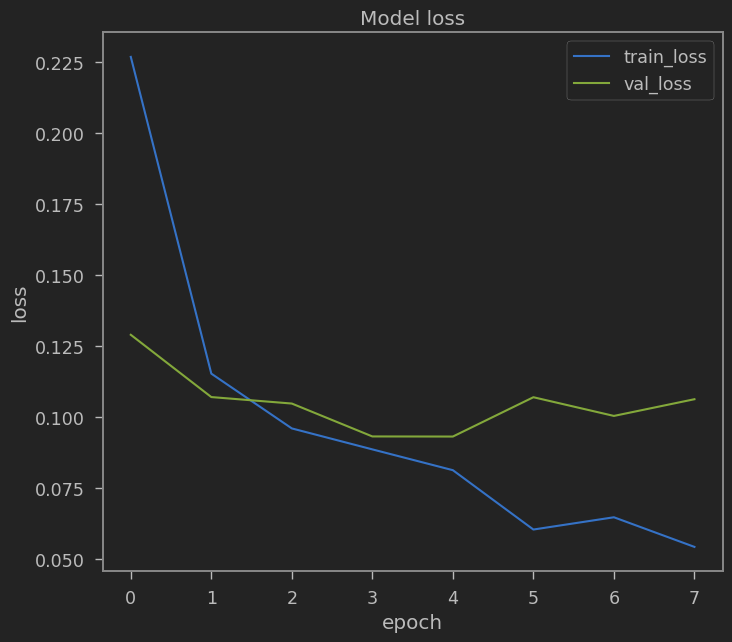

In [42]:
# Plot the model performance across epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# #9: Step 1: Load the Model




In [43]:
# Make prediction
from tensorflow.keras.models import load_model

model = load_model('model_best_point_early_stopping.h5')
predictions = model.predict(X_test)
prodiction = model.predict(X_test)
# Append the index of max value using argmax function
predict = []
for i in predictions:
    predict.append(np.argmax(i))
# print(predictions)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


#Step 2: Compile the Model


In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Get the acccuracy of the model
result = model.evaluate(X_test, y_test)

print("Accuracy : {}".format(result[1]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1050 - loss: 0.7175
Accuracy : 0.10520000010728836


In [46]:
# Get the original values
y_original = []

for i in y_test:
    y_original.append(np.argmax(i))

<Axes: >

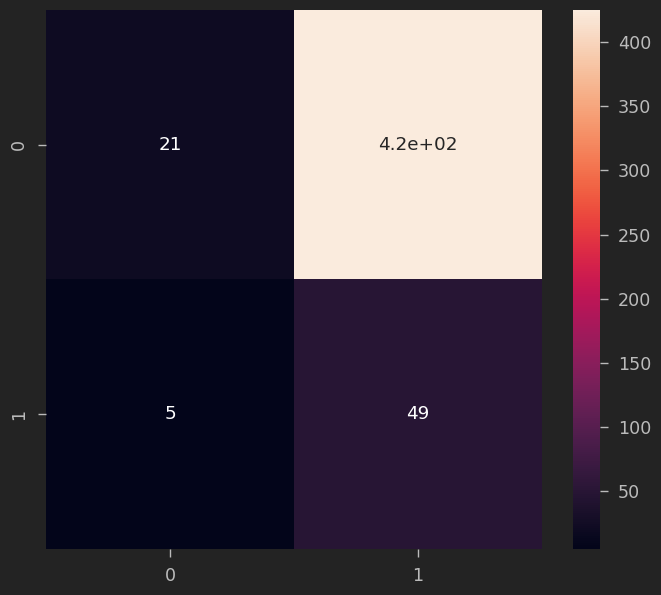

In [35]:
# Plot Confusion Matrix
confusion_matrix= metrics.confusion_matrix(y_original,predict)
sns.heatmap(confusion_matrix,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_original,predict))



              precision    recall  f1-score   support

           0       0.89      0.86      0.88       447
           1       0.09      0.11      0.10        53

    accuracy                           0.78       500
   macro avg       0.49      0.49      0.49       500
weighted avg       0.81      0.78      0.79       500



# As you can see! **"The model appears to be overfitting. To address this issue, we will implement strategies to improve generalization and reduce overfitting."**

*   Reduce Complexity: Decrease the number of neurons or layers to simplify the model. Overly complex models can fit the noise in the training data rather than the underlying patterns.


*   Regularization: Add L2 regularization to the Dense layers to penalize large weights and help prevent overfitting.





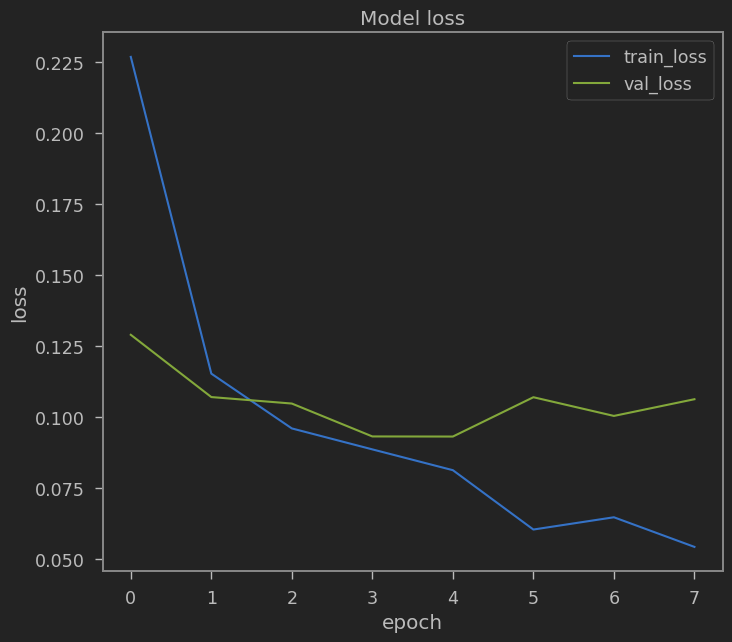

In [48]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Create the model
ANN_model = Sequential()

# Add layers with L2 regularization
ANN_model.add(Dense(128, input_dim=13, kernel_initializer='normal', activation='relu', kernel_regularizer=l2(0.01)))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
ANN_model.add(Dropout(0.4))

# Output layer with softmax activation
ANN_model.add(Dense(2, activation='softmax'))


# Compile the model
ANN_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define Early Stopping and Learning Rate Scheduler callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Train the model with Early Stopping and Learning Rate Scheduler
history = ANN_model.fit(X_train, y_train,
                        validation_split=(0.1),
                        epochs=100,
                        callbacks=[early_stopping, reduce_lr])

# Save the model after training
ANN_model.save('model_best_point_early_stopping.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8952 - loss: 4.6970 - val_accuracy: 0.8880 - val_loss: 1.3223 - learning_rate: 0.0010
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9106 - loss: 0.9578 - val_accuracy: 0.9520 - val_loss: 0.3747 - learning_rate: 0.0010
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9570 - loss: 0.3261 - val_accuracy: 0.9640 - val_loss: 0.2271 - learning_rate: 0.0010
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9641 - loss: 0.2183 - val_accuracy: 0.9720 - val_loss: 0.1866 - learning_rate: 0.0010
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9664 - loss: 0.1941 - val_accuracy: 0.9640 - val_loss: 0.1746 - learning_rate: 0.0010
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9719 - loss: 0.1715 - val_accuracy: 0.9680 - val_loss: 0.1549 - learning_rate: 0.0010
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9725 - loss: 0.1688 - val_acc

#the model is learning and improving its performance on both the training data and the validation data

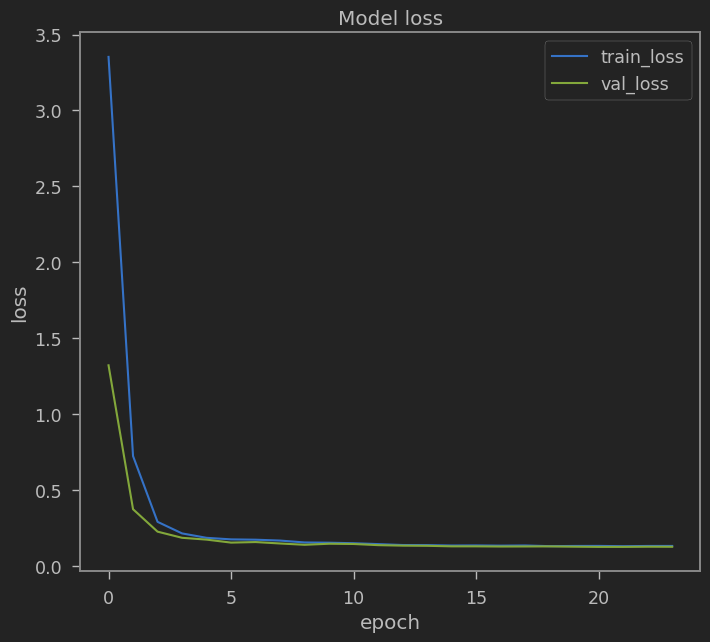

In [55]:
# Plot the model performance across epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

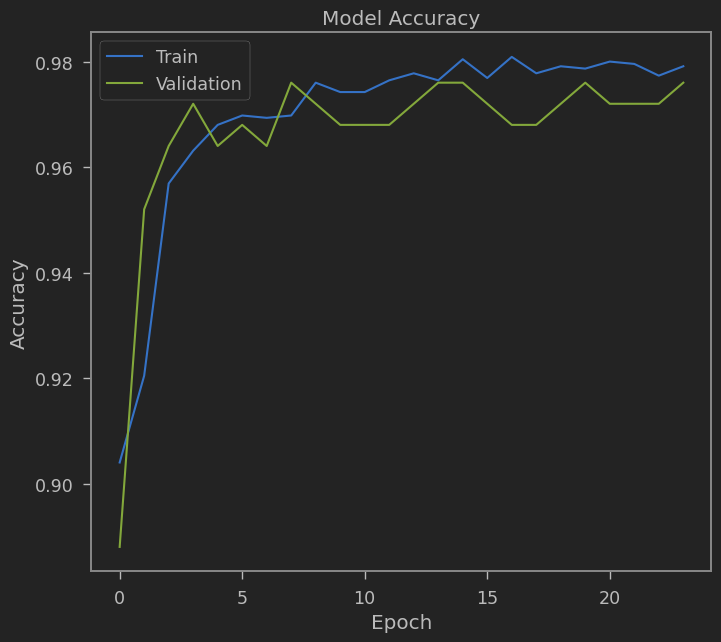

In [56]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [49]:
# Make prediction
from tensorflow.keras.models import load_model

model = load_model('model_best_point_early_stopping.h5')
predictions = model.predict(X_test)
prodiction = model.predict(X_test)
# Append the index of max value using argmax function
predict = []
for i in predictions:
    predict.append(np.argmax(i))
# print(predictions)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
# Get the acccuracy of the model
result = model.evaluate(X_test, y_test)

print("Accuracy : {}".format(result[1]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9747 - loss: 0.1316
Accuracy : 0.975600004196167


<Axes: >

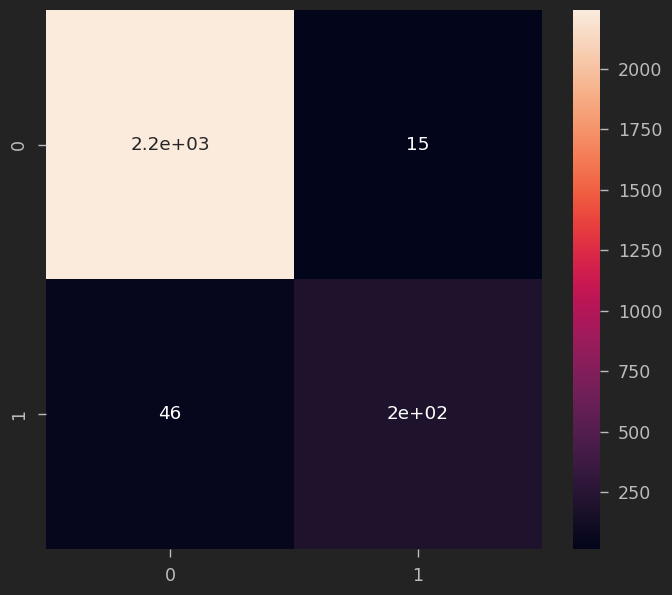

In [53]:
# Plot Confusion Matrix
confusion_matrix= metrics.confusion_matrix(y_original,predict)
sns.heatmap(confusion_matrix,annot=True)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_original,predict))



              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2257
           1       0.93      0.81      0.87       243

    accuracy                           0.98      2500
   macro avg       0.95      0.90      0.93      2500
weighted avg       0.97      0.98      0.97      2500

